<a href="https://colab.research.google.com/github/ekity1002/PyOptBook-memo/blob/main/Python%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%95%B0%E7%90%86%E6%9C%80%E9%81%A9%E5%8C%96_1_3%E7%AB%A0%E3%83%A1%E3%83%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install

In [1]:
! git clone https://github.com/ohmsha/PyOptBook.git
! cd PyOptBook; pip install -r requirements.txt

Cloning into 'PyOptBook'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 187 (delta 71), reused 61 (delta 41), pack-reused 76
Receiving objects: 100% (187/187), 2.25 MiB | 9.76 MiB/s, done.
Resolving deltas: 100% (88/88), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 4.8 MB/s 
     |████████████████████████████████| 121 kB 33.8 MB/s 
     |████████████████████████████████| 1.6 MB 34.4 MB/s 
     |████████████████████████████████| 83 kB 1.1 MB/s 


# 2章 最適化問題例
## 問題
ある工場で製品p,qを製造している。p,qを製造するには原料m,nが必要
* 製品pを1kgを製造するにはmが1ｋｇ，nが2kg必要
* 製品qを1kgを製造するにはmが3ｋｇ，nが1kg必要
* 原料mの在庫は30kg, 原料n の在庫は40kg
* 単位量あたりの利得は、製品 pは１万円、製品ｑは２万円
この条件で利得を最大化するにはどうすればよいか。

x+3y <= 30
2x+y <= 40
x>=0, y>=0 の条件のもとで、x+2yを最大化すればよい。

In [2]:
import pulp
problem = pulp.LpProblem('LP', pulp.LpMaximize)
x = pulp.LpVariable('x', cat='Continuous')
y = pulp.LpVariable('y', cat='Continuous') 

In [3]:
problem += 1*x + 3*y <= 30

In [4]:
problem

LP:
MAXIMIZE
None
SUBJECT TO
_C1: x + 3 y <= 30

VARIABLES
x free Continuous
y free Continuous

In [5]:
# 成約式を追加していく
problem += 2*x + 1*y <= 40
problem += x >= 0
problem += y>=0
problem += x + 2*y

In [6]:
problem

LP:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: x + 3 y <= 30

_C2: 2 x + y <= 40

_C3: x >= 0

_C4: y >= 0

VARIABLES
x free Continuous
y free Continuous

In [7]:
status = problem.solve()

In [8]:
pulp.LpStatus[status] #解が得られたか確認

'Optimal'

In [9]:
# x, y, 最大値の値
print(f"x={x.value()} y={y.value()}, obj={problem.objective.value()}")

x=18.0 y=4.0, obj=26.0


## 最適化問題の種類
* 線形計画問題：変数が実数値を取る問題。
* 整数計画問題：変数が整数を取る問題。0.5個などはゆるさない。
* 混合整数計画問題： 整数計画問題の一部の変数が実数値を取る問題。個数と同時に生産量を決める場合など。
* 0-1整数計画問題：変数が 0 or 1 を取る問題。割当てを決める場合など
* 凸二次計画問題：目的関数に凸な二次関数が現れる問題。２乗誤差を最小化する場合など。

In [10]:
# 例２ファイルから読み込んで得
import pandas as pd
gains = pd.read_csv('/content/PyOptBook/2.tutorial/gains.csv')
requires = pd.read_csv('/content/PyOptBook/2.tutorial/requires.csv')
stocks = pd.read_csv('/content/PyOptBook/2.tutorial/stocks.csv')

In [11]:
gains #利得

,p,gain
0,p1,3
1,p2,4
2,p3,4
3,p4,5


In [12]:
requires # 生産に必要な素材の個数

,p,m,require
0,p1,m1,2
1,p1,m2,0
2,p1,m3,1
3,p2,m1,3
4,p2,m2,2
5,p2,m3,0
6,p3,m1,0
7,p3,m2,2
8,p3,m3,2
9,p4,m1,2


In [13]:
stocks #在庫

,m,stock
0,m1,35
1,m2,22
2,m3,27


* 最大化するには
** a,b,c,d: 製品の個数, m1...m3: 原料
** a*2m1 >=
** 目的 3a + 4b + 4c + 5d をmaxに 

In [14]:
# 変数名のリストの定義
P = gains['p'].tolist()
M = stocks['m'].tolist()
M

['m1', 'm2', 'm3']

In [15]:
# 変数の定義
stock = dict(zip(stocks['m'], stocks['stock']))
stock

{'m1': 35, 'm2': 22, 'm3': 27}

In [16]:
requires

,p,m,require
0,p1,m1,2
1,p1,m2,0
2,p1,m3,1
3,p2,m1,3
4,p2,m2,2
5,p2,m3,0
6,p3,m1,0
7,p3,m2,2
8,p3,m3,2
9,p4,m1,2


In [29]:
require = {(row.p, row.m): row.require for row in requires.itertuples()} #idxなしで回せる
require

{('p1', 'm1'): 2,
 ('p1', 'm2'): 0,
 ('p1', 'm3'): 1,
 ('p2', 'm1'): 3,
 ('p2', 'm2'): 2,
 ('p2', 'm3'): 0,
 ('p3', 'm1'): 0,
 ('p3', 'm2'): 2,
 ('p3', 'm3'): 2,
 ('p4', 'm1'): 2,
 ('p4', 'm2'): 2,
 ('p4', 'm3'): 2}

In [30]:
gain = {row.p:row.gain for row in gains.itertuples()}
gain

{'p1': 3, 'p2': 4, 'p3': 4, 'p4': 5}

In [47]:
# 線形計画問題の定義
problem = pulp.LpProblem('LP2', pulp.LpMaximize)

In [48]:
# 変数定義：辞書を使ったやり方。
x = pulp.LpVariable.dicts('x', P, cat="Continuous")
x

{'p1': x_p1, 'p2': x_p2, 'p3': x_p3, 'p4': x_p4}

In [49]:
problem

LP2:
MAXIMIZE
None
VARIABLES

In [50]:
# xp >= 0  #商品個数は０以上
for p in P:
    problem += x[p] >= 0
problem

LP2:
MAXIMIZE
None
SUBJECT TO
_C1: x_p1 >= 0

_C2: x_p2 >= 0

_C3: x_p3 >= 0

_C4: x_p4 >= 0

VARIABLES
x_p1 free Continuous
x_p2 free Continuous
x_p3 free Continuous
x_p4 free Continuous

In [42]:
require['p1','m1']

2

In [51]:
# 生産は在庫の範囲で行う
# m1 について requre_p1 * p1 + reqiure_p2 * p2 + req_p3 * p3 <= stock_m1
# m2, m3 についても同様の制限が成り立つ
# lpSumでまとめて足し算をかける
for m in M:
    problem += pulp.lpSum([require[p,m] * x[p] for p in P]) <= stock[m]

In [52]:
# 目的関数：利益を最大化
problem += pulp.lpSum([ gain[p] * x[p] for p in P])

In [53]:
status = problem.solve()

In [56]:
# ステータスと変数の値確認
print(pulp.LpStatus[status])
for p in P:
    print(p, x[p].value())

Optimal
p1 12.142857
p2 3.5714286
p3 7.4285714
p4 0.0


In [57]:
print('obj=', problem.objective.value())

obj= 80.42857099999999


## 整数計画問題にしたいとき
* cat="Integer"にすればよい
* ただし、線形計画に比べて実行時間が遅い。
* 線形計画では１００万変数の問題を解くこともあるが、整数計画だと変数が１万程度でも解けなくなることがある
* なので、実務では線形計画で解いてから、解を丸めて実数にする方法（連続緩和）が有効になる
* ただし、丸めたことにより発生する解の誤差が許容できるかは、要確認。数％でも規模によっては大きな違いとなる。

# 3章
* うまくクラス分けをしたいという課題を最適化
** うまくクラス分けするとはどういうことかを言葉にしていく。
** このプロセスが最適化において大事。


## 要件整理
* 学年の全生徒を１クラスに割り当てる
* 各クラスの生徒の人数は39人以上、40人以下にする
* 各クラスの男子生徒、女子生徒の人数は20人以下とする
* 各クラスの学力試験の平均点は 学年平均+-10点 とする
* 各クラスにリーダー器質の生徒を二人以上割り当てる
* 特別な支援が必要な生徒は各クラスに1人以下とする
* 特定ペアの生徒は同一クラスに割り当てない

In [61]:
import pandas as pd
students = pd.read_csv('/content/PyOptBook/3.school/students.csv')
pairs = pd.read_csv('/content/PyOptBook/3.school/student_pairs.csv')

In [62]:
# id が連続している数字であり、かつユニークであるか
print(students.shape)
set(students['student_id'].tolist()) == set(range(1,319))

(318, 5)


True

In [63]:
students.describe()

,student_id,gender,leader_flag,support_flag,score
count,318.000000,318.000000,318.000000,318.000000,318.000000
mean,159.500000,0.496855,0.053459,0.012579,303.644654
std,91.942917,0.500778,0.225302,0.111622,65.179995
min,1.000000,0.000000,0.000000,0.000000,88.000000
25%,80.250000,0.000000,0.000000,0.000000,261.000000
50%,159.500000,0.000000,0.000000,0.000000,310.000000
75%,238.750000,1.000000,0.000000,0.000000,350.000000
max,318.000000,1.000000,1.000000,1.000000,485.000000


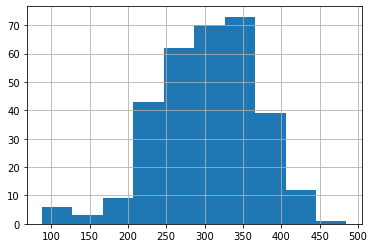

In [64]:
students.score.hist()

In [24]:
# ペアにしてはいけない生徒
pairs

,student_id1,student_id2
0,118,189
1,72,50
2,314,233


### モデル作成

In [25]:
# モデル作成
import pulp
prob = pulp.LpProblem('Class', pulp.LpMaximize)

In [26]:
# 要件1：各生徒を一つのクラスに割り当てる
# 生徒sがクラスcに属しているかどうかを表す変数 x_sc を用意し、0,1の値を取るとすると
# Σc x_sc = 1 をみたす
S = students['student_id'].tolist()
C = ['A','B','C','D','E','F','G','H'] #クラス名

In [ ]:
SC = [(s,c) for s in S for c in C]
SC

In [ ]:
# 生徒とクラスの組み合わせ変数 0,1を取る変数を定義
# 引数は左から、変数名、dictの key(今回は生徒とクラスの組み合わせ), タイプ
# SCの数だけ変数が作られる
x = pulp.LpVariable.dicts('x', SC, cat='Binary')
x

In [31]:
# 要件1：各生徒は1つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

In [ ]:
# 要件2：各クラスの生徒の数は39人以上、40人以下
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40
#prob

In [ ]:
# 要件３：各クラスの男子生徒、女子生徒の数は２０人以下とする
# 予めリストにしておくと楽
S_male = [row.student_id for row in students.itertuples() if row.gender == 1]
S_female = [row.student_id for row in students.itertuples() if row.gender == 0]
S_male

In [35]:
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S if s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S if s in S_female]) <= 20

In [40]:
# 各クラスの学力試験の平均点は、学年平均+-10におさめる
score = {row.student_id: row.score for row in students.itertuples()} #生徒の点数
# 平均点
score_mean = students.score.mean()

In [41]:
# 普通に制約を表すと score_mean - 10 <= Σscore * x_sc / Σx_cs  <= score_mean + 10 だが、
# そのまま使うと変数が分母分子に現れる非線形な式となり、ソルバの計算に制限が発生する。
# 移項して線形な式にすること!
for c in C:
    prob += (score_mean - 10) * pulp.lpSum([x[s,c] for s in S]) <= pulp.lpSum([score[s]*x[s,c] for s in S])
    prob += pulp.lpSum([score[s]*x[s,c] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

In [42]:
# 要件５：各クラスにリーダー器質の生徒を二人以上割り当てる
s_leader = [row.student_id for row in students.itertuples() if row.leader_flag == 1]
s_leader

[13, 28, 42, 74, 86, 88, 121, 138, 160, 184, 188, 220, 228, 248, 277, 284, 309]

In [43]:
for c in C:
    prob += pulp.lpSum(x[s,c] for s in S if s in s_leader) >= 2

In [44]:
# 要件６：特別な支援が必要は生徒は各クラスに１人以下とする
s_sup = [row.student_id for row in students.itertuples() if row.support_flag == 1]
s_sup

[27, 78, 263, 280]

In [45]:
for c in C:
    prob += pulp.lpSum(x[s,c] for s in S if s in s_sup) <= 1

In [47]:
# 要件7: 特定ペアの生徒は同一クラスに割り当てない
ss = [(row.student_id1, row.student_id2) for row in pairs.itertuples()]
ss

[(118, 189), (72, 50), (314, 233)]

In [48]:
for s1,s2 in ss:
    for c in C:
        # 同一クラスに割り当てない = 1以下
        prob += x[s1,c] + x[s2,c] <= 1

In [49]:
#解く
status = prob.solve()
print(status)

1


In [51]:
pulp.LpStatus[status]

'Optimal'

In [52]:
#各クラスに割り当てられた生徒の確認
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value() == 1]

In [53]:
for c, ss in C2Ss.items():
    print(f"class:{c}, num: {len(ss)}")
    print(f"students: {ss}")

class:A, num: 40
students: [2, 9, 19, 39, 42, 63, 65, 71, 79, 83, 85, 88, 99, 109, 111, 123, 126, 136, 138, 145, 148, 165, 168, 173, 177, 179, 180, 193, 199, 206, 224, 233, 237, 240, 246, 264, 267, 291, 292, 298]
class:B, num: 40
students: [11, 15, 48, 50, 70, 82, 89, 91, 102, 104, 113, 114, 120, 124, 127, 146, 149, 159, 167, 170, 172, 176, 188, 190, 203, 212, 213, 220, 222, 231, 238, 245, 263, 270, 275, 276, 283, 287, 290, 317]
class:C, num: 40
students: [3, 10, 14, 23, 25, 27, 31, 33, 41, 49, 53, 54, 58, 73, 93, 97, 98, 122, 142, 152, 156, 160, 171, 187, 210, 211, 217, 219, 227, 236, 242, 254, 258, 260, 268, 273, 277, 278, 301, 318]
class:D, num: 40
students: [13, 16, 36, 37, 43, 51, 56, 59, 61, 67, 68, 75, 84, 92, 108, 121, 128, 134, 139, 140, 158, 161, 175, 192, 198, 200, 205, 218, 221, 225, 235, 241, 252, 255, 256, 257, 261, 266, 293, 316]
class:E, num: 40
students: [5, 21, 22, 24, 38, 69, 72, 78, 87, 96, 105, 106, 107, 115, 129, 132, 141, 143, 150, 154, 164, 166, 183, 184, 189, 1

### 解を満たしているか

In [57]:
# 1:学年全生徒を１つのクラスに割り当てる
for s in S:
    assigned_cls = [x[s,c] for c in C if x[s,c].value()==1]
    if len(assigned_cls) != 1:
        print(f"error:", s)

In [76]:
#
result_df = students.copy() 
s2c = {s:c for s in S for c in C if x[s,c].value() == 1}
result_df['assigned_cls'] = result_df['student_id'].map(s2c)
result_df.head()

,student_id,gender,leader_flag,support_flag,score,assigned_cls
0,1,0,0,0,335,F
1,2,1,0,0,379,A
2,3,0,0,0,350,C
3,4,0,0,0,301,G
4,5,1,0,0,317,E


In [67]:
# ２：各クラスの人数が39人以上４０人以下
result_df.groupby('assigned_cls')['student_id'].count()

assigned_cls
A    40
B    40
C    40
D    40
E    40
F    39
G    40
H    39
Name: student_id, dtype: int64

In [68]:
# 3: 各クラスに割り当てられた男女の数がそれぞれ20人以下
result_df.groupby(['assigned_cls','gender'])['student_id'].count()    

assigned_cls  gender
A             0         20
              1         20
B             0         20
              1         20
C             0         20
              1         20
D             0         20
              1         20
E             0         20
              1         20
F             0         20
              1         19
G             0         20
              1         20
H             0         20
              1         19
Name: student_id, dtype: int64

In [70]:
# クラスの平均点が 全体平均+-10　か
print('score_mean', score_mean)
result_df.groupby('assigned_cls')['score'].mean() - score_mean

score_mean 303.6446540880503


assigned_cls
A    9.755346
B   -9.169654
C    8.355346
D    6.855346
E   -6.869654
F   -8.260039
G    8.605346
H   -9.721577
Name: score, dtype: float64

In [74]:
# 5: 各クラスにリーダー器質を二人以上
result_df.groupby(['assigned_cls'])['leader_flag'].sum()

assigned_cls
A    3
B    2
C    2
D    2
E    2
F    2
G    2
H    2
Name: leader_flag, dtype: int64

In [75]:
# 6: 特別な支援が必要な生徒はクラスに１人以下
result_df.groupby(['assigned_cls'])['support_flag'].sum()

assigned_cls
A    0
B    1
C    1
D    0
E    1
F    0
G    1
H    0
Name: support_flag, dtype: int64

In [80]:
# 7: 同一ペアの生徒を１クラスに割り当てない
ss = [(row.student_id1, row.student_id2) for row in pairs.itertuples()]
for i, (s1,s2) in enumerate(ss):
    print('cass',i)
    print(s2c[s1], s2c[s2])

cass 0
G E
cass 1
E B
cass 2
H A


### 各クラスの得点の分布について確認
* 平均が条件を満たしていても、分布に偏りがある可能性がある

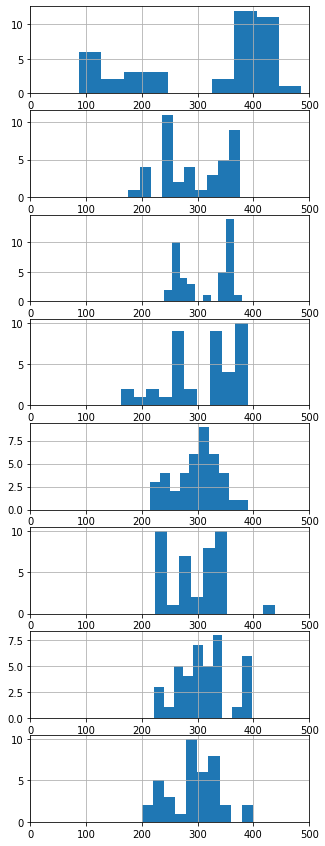

In [112]:
import matplotlib.pyplot as plt
def check_score_hist(result_df):
    fig, ax = plt.subplots(8,figsize=(5, 15))
    #print(ax)
    for i,c in enumerate(C):
        ax[i].set_xlim(0, 500)
        result_df.query('assigned_cls==@c')['score'].hist(ax=ax[i], bins=10)
    plt.show()
check_score_hist(result_df)

* 偏っているので修正する
* 具体的には、最初に理想形のクラスを割り当てておき、なるべくその理想形に従うように制約を加える
**

#### 現場でどうやっているかが、制約条件のヒントになる！

In [102]:
#学力をもとに順位付与
students['score_rank'] = students['score'].rank(ascending=False, method='first')
students

,student_id,gender,leader_flag,support_flag,score,score_rank
0,1,0,0,0,335,109.0
1,2,1,0,0,379,38.0
2,3,0,0,0,350,79.0
3,4,0,0,0,301,172.0
4,5,1,0,0,317,147.0
...,...,...,...,...,...,...
313,314,0,0,0,244,263.0
314,315,1,0,0,309,162.0
315,316,0,0,0,239,272.0
316,317,1,0,0,356,63.0


In [108]:
init_cls = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H'}
students['init_cls'] = students['score_rank'].map(lambda x: x%8).map(init_cls)
students

,student_id,gender,leader_flag,support_flag,score,score_rank,init_cls
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D
...,...,...,...,...,...,...,...
313,314,0,0,0,244,263.0,H
314,315,1,0,0,309,162.0,C
315,316,0,0,0,239,272.0,A
316,317,1,0,0,356,63.0,H


In [110]:
# 生徒、クラスの組み合わせについて、初期クラスかどうかを表す 変数
init_flag = {(s,c):0 for s in S for c in C}
for row in students.itertuples():
    init_flag[(row.student_id, row.init_cls)] = 1 

In [ ]:
init_flag

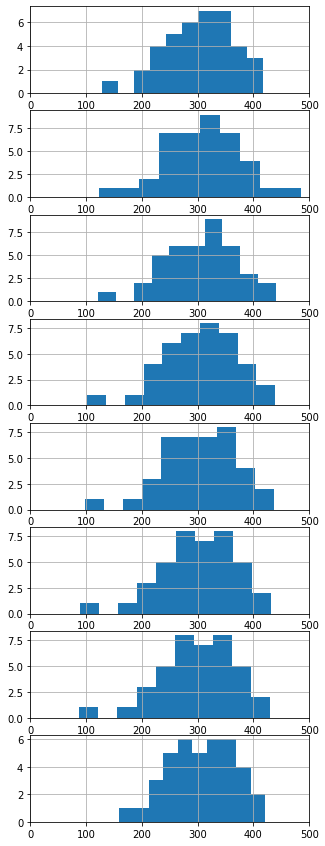

In [116]:
# 初期クラスに偏りがないか確認
fig, ax = plt.subplots(8,figsize=(5, 15))
#print(ax)
for i,c in enumerate(C):
    ax[i].set_xlim(0, 500)
    students.query('init_cls==@c')['score'].hist(ax=ax[i], bins=10)
plt.show()


## 初期化条件を含めて再構築

In [118]:
prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

# 生徒のリスト
S = students['student_id'].tolist()

# クラスのリスト
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]

# 生徒をどのクラスに割り当てるを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

# (1)各生徒は１つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

# (2)各クラスの生徒の人数は39人以上、40人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40

# 男子生徒のリスト
S_male = [row.student_id for row in students.itertuples() if row.gender == 1]

# 女子生徒のリスト
S_female = [row.student_id for row in students.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

# 学力を辞書表現に変換
score = {row.student_id:row.score for row in students.itertuples()}

# 平均点の算出
score_mean = students['score'].mean()

# (4) 各クラスの学力試験の平均点は学年平均点±10点とする。      
for c in C:
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) >= (score_mean - 10) * pulp.lpSum([x[s,c] for s in S])
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

# リーダー気質の生徒の集合
S_leader = [row.student_id for row in students.itertuples() if row.leader_flag == 1]

# (5)各クラスにリーダー気質の生徒を2人以上割り当てる。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

# 特別な支援が必要な生徒の集合
S_support = [row.student_id for row in students.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに1人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

# 生徒の特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in pairs.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない。
for s1, s2 in SS:
    for c in C:
        prob += x[s1,c] + x[s2,c] <= 1

# 初期クラス編成を作成
students['score_rank'] = students['score'].rank(ascending=False, method='first')
class_dic = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
students['init_assigned_class'] = students['score_rank'].map(lambda x:x % 8).map(class_dic)
init_flag = {(s,c): 0 for s in S for c in C}
for row in students.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1
    
# 目的関数:初期クラス編成と最適化結果のクラス編成をできるだけ一致させる
prob += pulp.lpSum([x[s,c] * init_flag[s,c] for s,c in SC])        

# 求解        
status = prob.solve()
print('Status:', pulp.LpStatus[status])

# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value()==1]
    
for c, Ss in C2Ss.items():
    print('Class:', c)
    print('Num:', len(Ss))
    print('Student:', Ss)
    print()

Status: Optimal
Class: A
Num: 40
Student: [2, 23, 56, 68, 76, 82, 89, 102, 106, 113, 115, 121, 123, 124, 127, 140, 172, 173, 185, 186, 204, 210, 228, 255, 267, 273, 274, 280, 285, 288, 289, 292, 295, 297, 304, 308, 311, 313, 316, 318]

Class: B
Num: 39
Student: [11, 14, 17, 30, 32, 35, 41, 49, 64, 66, 79, 83, 86, 88, 97, 114, 119, 122, 132, 134, 141, 149, 151, 165, 175, 178, 190, 198, 200, 209, 213, 216, 226, 237, 272, 296, 303, 306, 307]

Class: C
Num: 40
Student: [21, 38, 44, 46, 51, 54, 62, 63, 73, 75, 84, 85, 99, 120, 138, 142, 143, 144, 150, 166, 183, 184, 192, 193, 195, 201, 205, 207, 211, 212, 217, 221, 222, 243, 244, 263, 264, 287, 299, 315]

Class: D
Num: 40
Student: [5, 24, 39, 47, 50, 61, 67, 74, 90, 92, 93, 100, 109, 116, 131, 136, 147, 152, 155, 167, 169, 170, 176, 177, 196, 199, 214, 218, 219, 227, 230, 231, 236, 238, 239, 253, 257, 259, 271, 309]

Class: E
Num: 39
Student: [4, 8, 12, 13, 19, 22, 33, 43, 48, 55, 57, 59, 98, 112, 125, 130, 133, 137, 139, 153, 160, 189, 203

In [120]:
# 検証用のデータフレームの用意
result_df2 = students.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
S2C = {}
for s in S:
    S2C[s] = [c for c in C if x[s,c].value()==1][0]

# 生徒データに各生徒が度のクラスに割り当てられたかの情報を結合            
result_df2['assigned_class'] = result_df2['student_id'].map(S2C)
result_df2.head(5)

,student_id,gender,leader_flag,support_flag,score,score_rank,init_cls,init_assigned_class,assigned_class
0,1,0,0,0,335,109.0,F,F,F
1,2,1,0,0,379,38.0,G,G,A
2,3,0,0,0,350,79.0,H,H,H
3,4,0,0,0,301,172.0,E,E,E
4,5,1,0,0,317,147.0,D,D,D


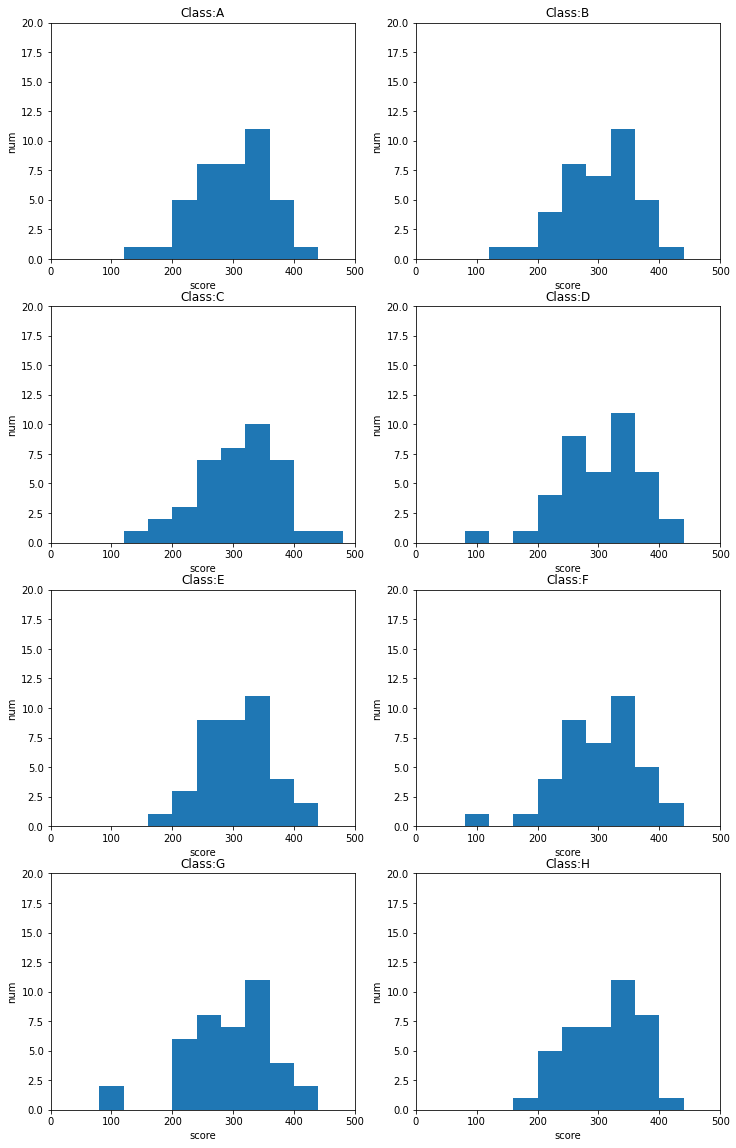

In [121]:

fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
    cls_df = result_df2[result_df2['assigned_class']==c]
    ax = fig.add_subplot(4
                         , 2
                         , i+1
                         , xlabel='score'
                         , ylabel='num'
                         , xlim=(0, 500)
                         , ylim=(0, 20)
                         , title='Class:{:s}'.format(c)
                        )    
    ax.hist(cls_df['score'], bins=range(0,500,40))